## Machine learning models 

In [10]:
#import libraries 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd 


In [2]:
#load training and testing dataset
df_train =  pd.read_csv("../EDA/train.csv")
df_test =  pd.read_csv("../EDA/test.csv")

In [3]:
# find the correlation between the target and other variables 
df_train.corr()['Price']


Year           0.361355
Engine_Size    0.318123
Mileage       -0.254367
Price          1.000000
Negotiable          NaN
Name: Price, dtype: float64

In [4]:
#remove the price from the dataset
X_train = df_train.drop(['Price'],axis=1)
y_train = df_train['Price']

X_test = df_test.drop(['Price'],axis=1)
y_test = df_test['Price']

In [5]:

#numerical variables 
num_pipe1=make_pipeline(StandardScaler())

#categorical variables 
cat_pipe2=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

columns_trans=make_column_transformer((num_pipe1,['Year','Mileage','Engine_Size']),
                           (cat_pipe2,['Make','Type','Origin','Color','Options','Fuel_Type','Gear_Type','Region','Negotiable','Manu_Country']),
                          remainder='passthrough')

# By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through.*


## Linear regression model

In [15]:


# create linear regression
LR_pipeline=make_pipeline(columns_trans,LinearRegression())
LR_pipeline.fit(X_train,y_train)
y_pred= LR_pipeline.predict(X_test)


#print the score of trining and testing
LR_pipeline.score(X_train, y_train), LR_pipeline.score(X_test, y_test)

print("R2 score on Traing set: %.2f"% LR_pipeline.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% LR_pipeline.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.77
R2 score on Testing set: 0.70
Mean squared error: 495477018.47


## Descion Tree model

In [16]:
# create DT regression model 

DS_R= make_pipeline(columns_trans,DecisionTreeRegressor())

DS_R.fit(X_train, y_train)
y_pred2= DS_R.predict(X_test)

print("R2 score on Traing set: %.2f"% DS_R.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% DS_R.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred2))

R2 score on Traing set: 1.00
R2 score on Testing set: 0.62
Mean squared error: 634502107.06


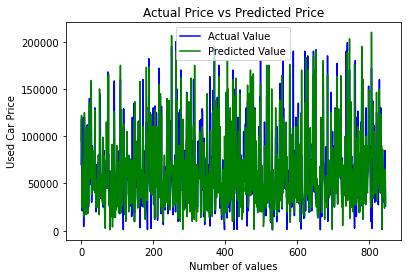

In [20]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred2, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Used Car Price')
plt.legend()
plt.show()

## KNN model

In [26]:
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor



knn_model= make_pipeline(columns_trans,KNeighborsRegressor(n_neighbors=3))

knn_model.fit(X_train, y_train)
y_pred3= knn_model.predict(X_test)



train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)


test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
rmse = sqrt(mse)

print("R2 score on Traing set: %.2f"% knn_model.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% knn_model.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred3))

R2 score on Traing set: 0.84
R2 score on Testing set: 0.64
Mean squared error: 602886635.61


In [28]:
X_test

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable,Manu_Country
0,Toyota,FJ,2012,Saudi,Black,Full,4.0,Gas,Automatic,35000,Riyadh,False,Japan
1,Ford,Explorer,2016,Other,White,Full,3.5,Gas,Automatic,128644,Riyadh,False,America
2,Toyota,Innova,2017,Saudi,Black,Full,2.7,Gas,Automatic,247000,Jeddah,False,Japan
3,Volkswagen,Tiguan,2012,Unknown,Navy,Full,2.0,Gas,Automatic,170000,Jeddah,False,Germany
4,Hyundai,Sonata,2019,Saudi,Grey,Standard,2.4,Gas,Automatic,113057,Riyadh,False,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,Kia,Cadenza,2017,Saudi,Silver,Standard,3.3,Gas,Automatic,83000,Riyadh,False,South Korea
842,Toyota,Camry,2014,Saudi,White,Standard,2.5,Gas,Automatic,220,Riyadh,False,Japan
843,Land Rover,Range Rover,2009,Saudi,Blue,Full,5.0,Gas,Automatic,214000,Al-Medina,False,England
844,Toyota,Furniture,2016,Gulf Arabic,Grey,Full,2.7,Gas,Automatic,185000,Riyadh,False,Japan


TypeError: '(slice(None, None, None), 0)' is an invalid key

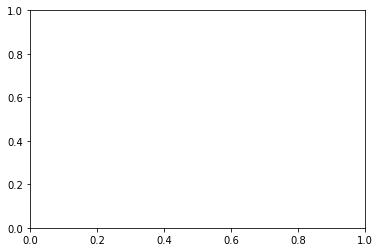

In [27]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred3, s=50, cmap=cmap)
f.colorbar(points)
plt.show()